<p style="width:35%;float:right;padding-left:50px">
<img src=http://www.geophysik.uni-muenchen.de/~igel/snap.png?raw=true>
<span style="font-size:smaller">
from <span style="font-style: italic">Nissen-Meyer et al. (2014). AxiSEM: broadband 3-D seismic wavefields in axisymmetric media. Solid Earth, 5(1), 425–445.</span>
</span>
</p>

# Computational Seismology 


## *Numerical derivative based on the Fourier Transform*


**Authors:** *Fabian Lindner and Heiner Igel*

### Exercise
Calculate the numerical derivative based on the Fourier transform to show that the derivative is exact. Define an arbitrary function (e.g. a Gaussian) and initialize its analytical derivative on the same spatial grid. Calculate the numerical derivative and the difference to the analytical solution. Vary the wavenumber content of the analytical function. Does it make a difference? Why is the numerical result not entirely exact?

<div style="clear:both"></div>

The derivative of a function $f(x)$ is calculated using the differentiation theorem of the Fourier transform:
$$ \frac{d}{dx} f(x) = IFT[ik \ F(k)]$$
with $IFT$, $i$, $k$ and $F(k)$ being the inverse Fourier transform, the imaginary unit, the wavenumber and the complex spectra of the function $f(x)$, respectively.

In [1]:
# This is a configuration step for the exercise. Please run it before calculating the derivative!
import numpy as np
import matplotlib.pyplot as plt

# Show the plots in the Notebook.
plt.switch_backend("nbagg")

<IPython.core.display.Javascript object>


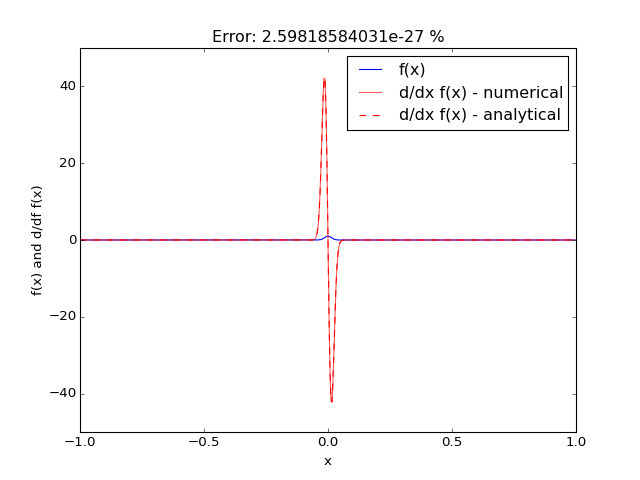

In [2]:
# Initialize arbitrary test function on regular grid
# Regular grid x between -1 and 1
nx = 501
# x=array between -1 nd 1 with 100 steps
x, dx = np.linspace(-1, 1, nx, retstep=True) 
x = x[:-1]
nx -= 1

# Function example: Gaussian
# Width of Gaussian
s = .02
# Gaussian function (modify!)
f = np.exp(-1/s**2 * x**2)
#f = np.sin(2*np.pi * x+2)
# Analytical derivative
df_ana = -2/s**2 * x * np.exp(-1/s**2 * x**2)
#df_ana = 2*np.pi * np.cos(2*np.pi * x+2)

# Calculate numerical derivative using Fourier PS method
# Initialize k vector up to Nyquist wavenumber
kmax = np.pi / dx
dk = kmax / (nx/2)
k = np.arange(float(nx))
k[:nx/2] = k[:nx/2] * dk 
k[nx/2:] = k[:nx/2] - kmax

# FFT and IFFT
ff = np.fft.fft(f)
ff = 1j * k * ff
df_num = np.real(np.fft.ifft(ff))

# Calculate error between analytical and numerical solution
err = np.sum((df_num - df_ana)**2) / np.sum(df_ana**2) * 100

# Plot analytical and numerical result
plt.plot(x,f,'b',label='f(x)')
plt.plot(x,df_num,'r',label='d/dx f(x) - numerical',alpha=0.65)
plt.plot(x,df_ana,'r--',label='d/dx f(x) - analytical')
plt.xlabel('x')
plt.ylabel('f(x) and d/df f(x)')
plt.title('Error: %s %%'%err)
plt.legend(loc='upper right')
plt.show()

In [9]:
import numpy as np
np.fft.fft2?

In [26]:
A = np.zeros((5, 5))
print A[0,0]

0.0
